# Chapter 2 - Inferences in Regression and Correlation Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.api import het_breuschpagan, anova_lm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats
from math import sqrt
import numpy as np

DATA_DIR = "../data"
yhat = '\u0177'
square = '\u00b2'

# 2.1 Inferences Concerning $\beta_1$

### Input the Toluca Company Data

In [2]:
df = pd.read_pickle(f"{DATA_DIR}/CH01TA01.xz")
df.columns = ['x', 'y']
model = ols("y ~ x", data=df).fit()

### Table 2.1 and Figure 2.2 (p 46)

In [5]:
display(model.summary())
display(anova_lm(model, typ=1))
display(anova_lm(ols("y ~ 1", df).fit()))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.45e-10
Time:                        15:57:03   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
x              3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,252377.580808,252377.580808,105.875709,4.448828e-10
Residual,23.0,54825.459192,2383.715617,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
Residual,24.0,307203.04,12800.126667,NaN,NaN


# 2.2 Inferences Concerning $\beta_0$ (p 48)

### Example (p 49)

Parameter confidence intervals

In [8]:
model.conf_int(alpha=0.1)

,0,1
Intercept,17.501100,107.230617
x,2.975536,4.164868


# 2.3 Some Considerations on Making Inferences Concerning $\beta_0$ and $\beta_1$ (p 50)

##### Topics

Effects of Departures from Normality

Interpretation of Confidence Coefficient and Risks of Errors

Spacing of the $X$ Levels

Power of Tests

# 2.4 Interval Estimation of $E\{Y_h\}$ (p 52)

### Example (p 54-55, 59)

Prediction (obs) and confidence (mean) intervals.

In [5]:
model.get_prediction({"x": [65, 100]}).summary_frame(alpha=0.1)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,294.428990,9.917579,277.431534,311.426446,209.043195,379.814785
1,419.386061,14.272328,394.925125,443.846996,332.207177,506.564945


# 2.5 Prediction of New Observations (p 55)

# 2.6 Confidence Band for Regression Line (p 61)

### Example (p 61)

Computing Working-Hotelling confidence intervals for $X_{h} = 100\ (y \pm W*se$)

##### Note

Since Python doesn't appear to have this built-in, but it's not hard to make the adjustments using available tools, as shown below. I just added these new bands to the built-in `get_prediction` function on a model result object. Then this is applied to all the rows.

In [6]:
W = sqrt(2 * stats.f.ppf(1-0.1, 2, 23))
yh = model.get_prediction({"x": [100]}).summary_frame(alpha=0.1)
yh["wh_ci_lower"] = yh["mean"] - W*yh.mean_se
yh["wh_ci_upper"] = yh["mean"] + W*yh.mean_se
yh

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,wh_ci_lower,wh_ci_upper
0,419.386061,14.272328,394.925125,443.846996,332.207177,506.564945,387.159097,451.613024


In [7]:
prediction = model.get_prediction().summary_frame(alpha=0.1)
dat = pd.concat([df, prediction], axis=1)
dat["wh_ci_lower"] = dat["mean"] - W*dat.mean_se
dat["wh_ci_upper"] = dat["mean"] + W*dat.mean_se
dat = dat.sort_values('x')
dat

,x,y,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,wh_ci_lower,wh_ci_upper
13,20,113,133.769899,19.907858,99.650388,167.889410,43.404189,224.135609,88.817889,178.721909
1,30,121,169.471919,16.969741,140.387963,198.555875,80.884691,258.059147,131.154188,207.789651
20,30,273,169.471919,16.969741,140.387963,198.555875,80.884691,258.059147,131.154188,207.789651
16,30,212,169.471919,16.969741,140.387963,198.555875,80.884691,258.059147,131.154188,207.789651
22,40,244,205.173939,14.272328,180.713004,229.634875,117.995055,292.352823,172.946976,237.400903
10,40,160,205.173939,14.272328,180.713004,229.634875,117.995055,292.352823,172.946976,237.400903
2,50,221,240.875960,11.979336,220.344916,261.407003,154.717128,327.034791,213.826579,267.925341
17,50,268,240.875960,11.979336,220.344916,261.407003,154.717128,327.034791,213.826579,267.925341
9,50,157,240.875960,11.979336,220.344916,261.407003,154.717128,327.034791,213.826579,267.925341
5,60,224,276.577980,10.362798,258.817475,294.338485,191.037019,362.118941,253.178746,299.977213


### Figure 2.6 (p 62)

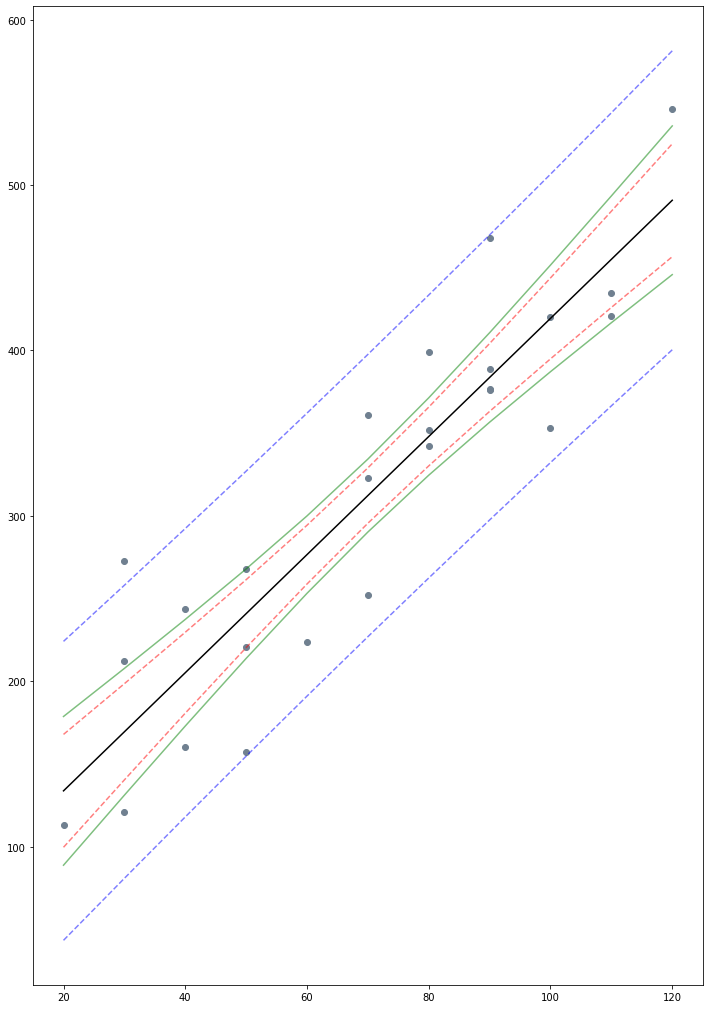

In [8]:
plt.figure(figsize=(12, 18))
plt.scatter(dat.x, dat.y, color='slategrey')
alpha = 0.5
plt.plot(
    dat.x, dat.obs_ci_lower, 'b--',
    dat.x, dat.obs_ci_upper, 'b--', 
    alpha=alpha)
plt.plot(
    dat.x, dat.mean_ci_lower, 'r--',
    dat.x, dat.mean_ci_upper, 'r--', 
    alpha=alpha)
plt.plot(
    dat.x, dat.wh_ci_lower, 'g',
    dat.x, dat.wh_ci_upper, 'g', 
    alpha=alpha)
plt.plot(dat.x, dat["mean"], 'black')
plt.show()

# 2.7 Analysis of Variance Approach to Regression Analysis (p 63)

### Example (p 71)

F-test of $beta_{1}$

The F-statistic is immediately accessible, but it's computed via `model.mse_model / model.mse_resid`

In [9]:
(
    model.fvalue, 
    stats.f.ppf(0.95, 1, len(df)-2),
    model.fvalue >= stats.f.ppf(0.95, 1, len(df)-2)
)

(105.87570891593045, 4.279344309144648, True)

# 2.8 General Linear Test Approach (p 72)

##### Topics

Full Model

Reduced Model

Test Statistic

Summary

> The general linear test approach can be used for h ighly complex tests of linear statistical models, as well as for simple tests. The basic steps in summary form are:
>
> 1. Fit the full model and obtain the error sum of squares $SSE(F)$
> 2. Fit the reduced model under $H_0$ andobtain the error sum of squares $SSE(R)$
> 3. Use test statistic (2.70) and decision rule (2.71)

# 2.9 Descriptive Measures of Linear Association between X and Y (p 74)

### Example (p 75-76)

Coefficient of Determination and Coefficient of Correlation

##### Notes

The components of SSR and SSTO are available directly or computationally. To compute R-squared ($\frac{SSR}{SSTO}$) directly would be done via

`model.ess / (model.ssr + model.ess)`

In [10]:
model.ssr, model.rsquared, np.sqrt(model.rsquared)
display(model.summary())
display(anova_lm(model, typ=1))
pd.DataFrame({
    "SSR": model.ess,
    "SSTO": model.ssr + model.ess,
    "Rsq": model.rsquared,
    "r": np.sqrt(model.rsquared) 
}, index=[0]).round(4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.45e-10
Time:                        15:04:34   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
x              3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,252377.580808,252377.580808,105.875709,4.448828e-10
Residual,23.0,54825.459192,2383.715617,NaN,NaN


,SSR,SSTO,Rsq,r
0,252377.5808,307203.04,0.8215,0.9064


# 2.10 Considerations in Applying Regression Analysis (p 77)

This section is just a long discussion.

# 2.11 Normal Correlation Models (p 78)

### Input the Sales Marketing Data

In [11]:
df = pd.read_pickle(f"{DATA_DIR}/CH02TA04.xz")
df.columns = ['x', 'y']

### Table 2.4 (p 87-89)

Data on Population, Expenditures and Their Ranks -- Sales Marketing Example

In [12]:
display(pd.DataFrame({"Population": df.x, "Expenditure": df.y, "R1": df.x.rank(), "R2": df.y.rank()}))
rho, p = stats.spearmanr(df.x, df.y)
np.corrcoef(df.x.rank(), df.y.rank())[0, 1] # Alternative
print(f"Spearman Rank Correlation: {rho}")

t = rho*sqrt(len(df)-2) / sqrt(1 - rho**2)
cv = stats.t.ppf(1-0.01/2, len(df)-2)
print(f"|t*| statistic {round(abs(t), 2)} > critical value {round(cv, 2)}")
print(f"Hypothesis test result: " + "Reject Null" if abs(t) > cv else "Inconclusive")

,Population,Expenditure,R1,R2
0,29,127,1.0,2.0
1,435,214,8.0,11.0
2,86,133,3.0,4.0
3,1090,208,11.0,10.0
4,219,153,7.0,6.0
5,503,184,9.0,8.0
6,47,130,2.0,3.0
7,3524,217,12.0,12.0
8,185,141,6.0,5.0
9,98,154,5.0,7.0


Spearman Rank Correlation: 0.8951048951048951
|t*| statistic 6.35 > critical value 3.17
Hypothesis test result: Reject Null


# References

[Linear Model Regression Results (statsmodels)](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html)

[Contrast Coding (statsmodels)](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

[QQ Plot or Normal Probability Plot (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

[Levene or Brown-Forsythe Test (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

[Z-Score Transformation (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

[Box Cox Transformations (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

### Graphics

[Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

[Matplotlib Color Maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)